# 4.3: Mastering power law distributions

Write code to generate three synthetic networks having 10,000 nodes and degree
distribution following a power-law with exponent γ = 2.2, γ = 2.5, and γ = 3.
After generating the networks, fit the three obtained distributions using the
tools covered in class. Is there an agreement between the result of the fitting
and what you would expect? Why or why not?

In [1]:
# imports

import networkx as nx
from matplotlib import pyplot as plt
import powerlaw
from collections import Counter
from tqdm import tqdm
import random
import warnings
warnings.filterwarnings("ignore")

In [29]:
n = 10 ** 4                            # 10,000 nodes
alphas = [2.2, 2.5, 3.0]               # the three given gammas
_2_2, _2_5, _3_0 = [], [], []          # arrays to hold fitted gammas ("alpha" in powerlaw library)

def run():
    """
    Function generates a graph with each of the provided gammas.
    Then it determines gamma through fitting and appends to the
    corresponding gamma array.
    """
    for i in range(len(alphas)):
        degrees = nx.utils.powerlaw_sequence(n, alphas[i])
        degrees = [int(d) for d in degrees]
        if sum(degrees) % 2 != 0:
            degrees[-1] += random.choice([1, -1])
        G = nx.configuration_model(degrees)
        #G = nx.Graph(G)
        fit = powerlaw.Fit(list(dict(G.degree()).values()), verbose=False)
        if i % 3 == 0:
            _2_2.append(fit.alpha)
        elif i % 3 == 1:
            _2_5.append(fit.alpha)
        else:
            _3_0.append(fit.alpha)

100%|██████████| 25/25 [00:14<00:00,  1.72it/s]


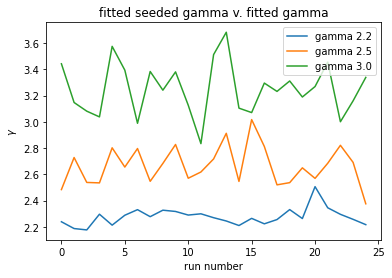

In [30]:
"""
We run the experiement above 10 times, and plot the outcome.
"""
random.seed(42)
for i in tqdm(range(25)):
    run()


plt.plot(_2_2, label='gamma 2.2')    
plt.plot(_2_5, label='gamma 2.5')
plt.plot(_3_0, label='gamma 3.0')
plt.legend()
plt.title('fitted seeded gamma v. fitted gamma')
plt.ylabel(r'$\gamma$')
plt.xlabel('run number')
plt.show()

Though the graphs above are clearly oscilating in the vicinity of their corresponding originial $\gamma$'s, they do seem to reliably overshoot.

One explanation could be that $\gamma$ is largely determined by how big the largest values are relative to the length of the array. This possibility is echoed by variance of the largest degree in the genereated sequences below.

What is intersting here is that the most common largest degree is 300-ish, though when it does deviate significantly, it deviates upwards.

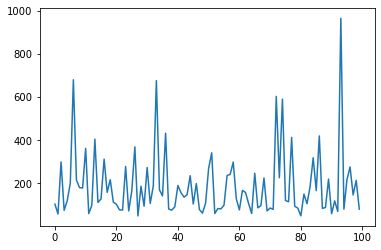

In [31]:
random.seed(42)
degrees = []
for i in range(100):
    degrees.append(max(nx.utils.powerlaw_sequence(10 ** 4, 3)))
plt.plot(degrees);